In [1]:
from fish import fish
env = fish()


In [2]:
from sb3_contrib import TQC, ARS
from stable_baselines3 import PPO, A2C, DQN, SAC, TD3
from stable_baselines3.common.env_util import make_vec_env
vec_env = make_vec_env(fish, 12)


In [3]:
model = ARS("MlpPolicy", vec_env, verbose=0, tensorboard_log="/home/jovyan/logs")
model.learn(total_timesteps=200_000, tb_log_name="ars-fish", progress_bar=True)
model.save("ars_fish")

Output()

In [10]:
%%time
model = PPO("MlpPolicy", vec_env, verbose=0, tensorboard_log="/home/jovyan/logs", use_sde=True, device ="cpu")
model.learn(total_timesteps=800_000, tb_log_name="ppo-fish", progress_bar=True)
model.save("ppo_fish")

Output()

CPU times: user 1h 11min 23s, sys: 4.92 s, total: 1h 11min 28s
Wall time: 5min 57s


In [5]:
model = TQC("MlpPolicy", env, verbose=0, tensorboard_log="/home/jovyan/logs", use_sde=True)
model.learn(total_timesteps=200_000, tb_log_name= "tqc-fish", progress_bar=True)
model.save("tqc_fish")

Output()

/home/rstudio/cboettig/rl-minicourse/utils.py:58: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.


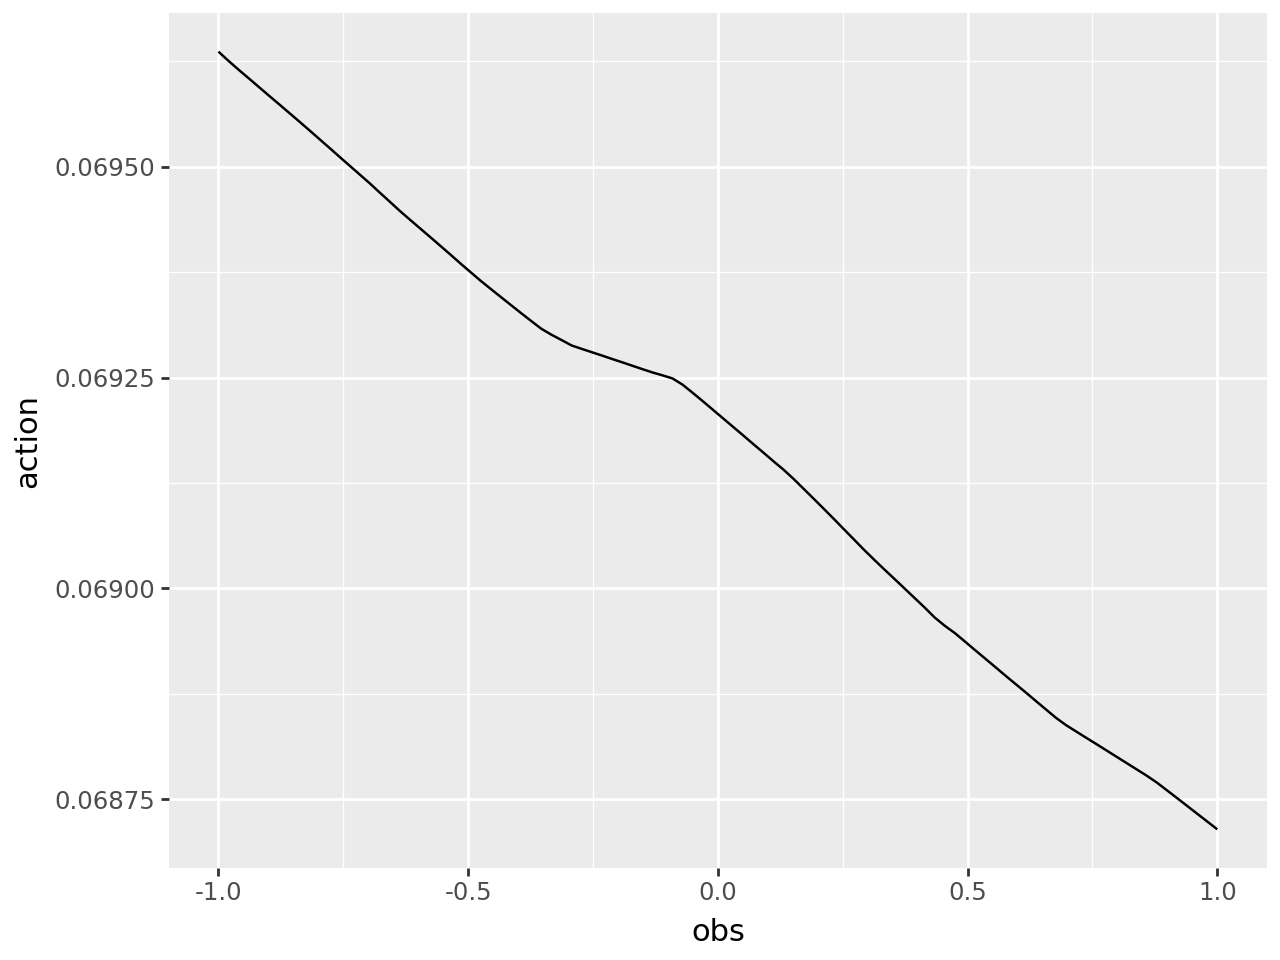

In [6]:
from utils import policy_fn
import numpy as np
#policy_fn(model, env)
model = ARS("MlpPolicy", env, device="cpu")
agent = model.load("ars_fish")
policy_fn(agent, env, N = 100)

/home/rstudio/cboettig/rl-minicourse/utils.py:58: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.


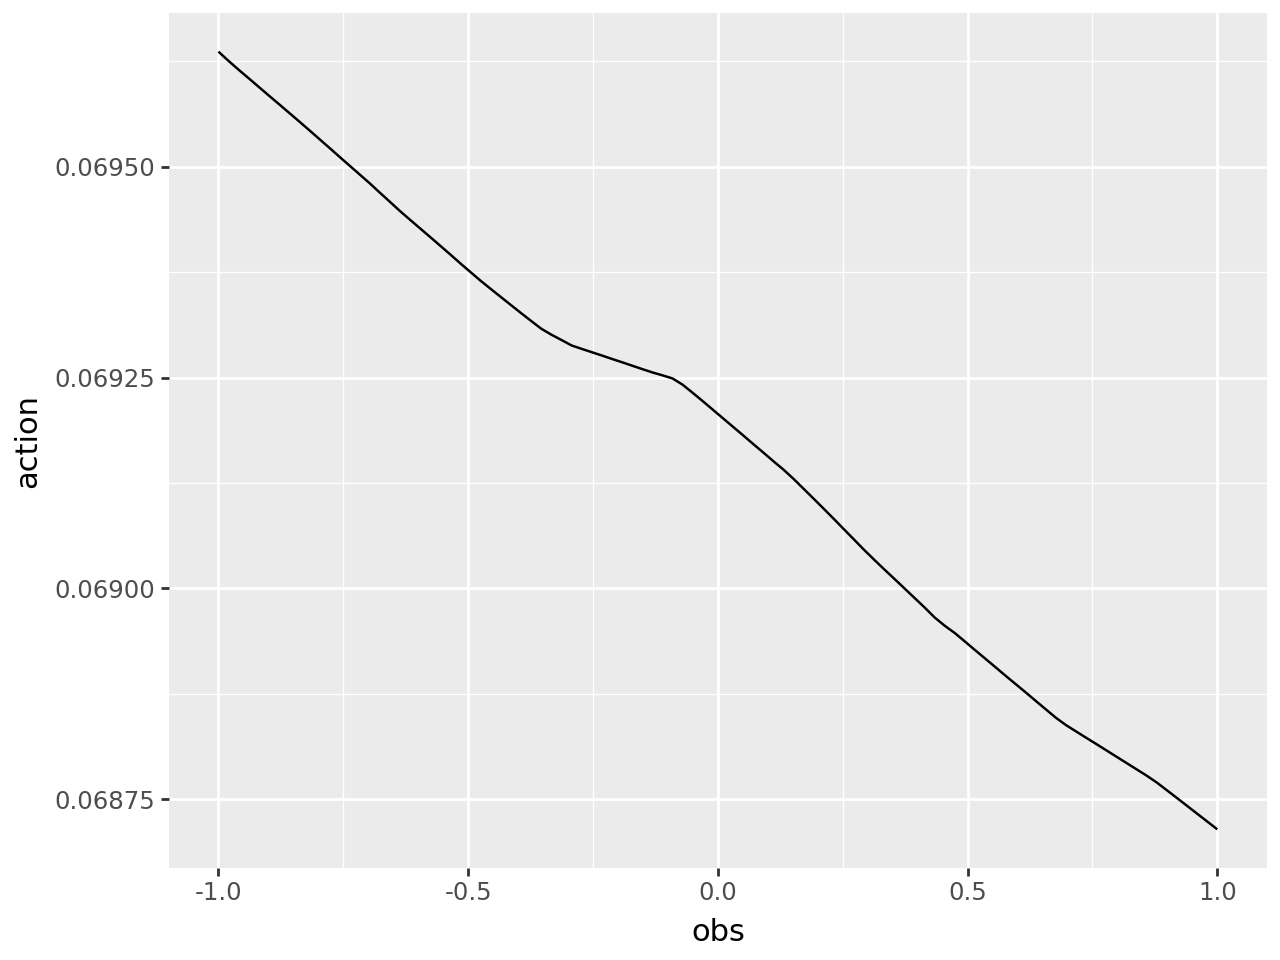

In [9]:
model = ARS("MlpPolicy", env, device="cpu")
agent = model.load("ars_fish")
policy_fn(agent, env, N = 100)

/home/rstudio/cboettig/rl-minicourse/utils.py:58: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.


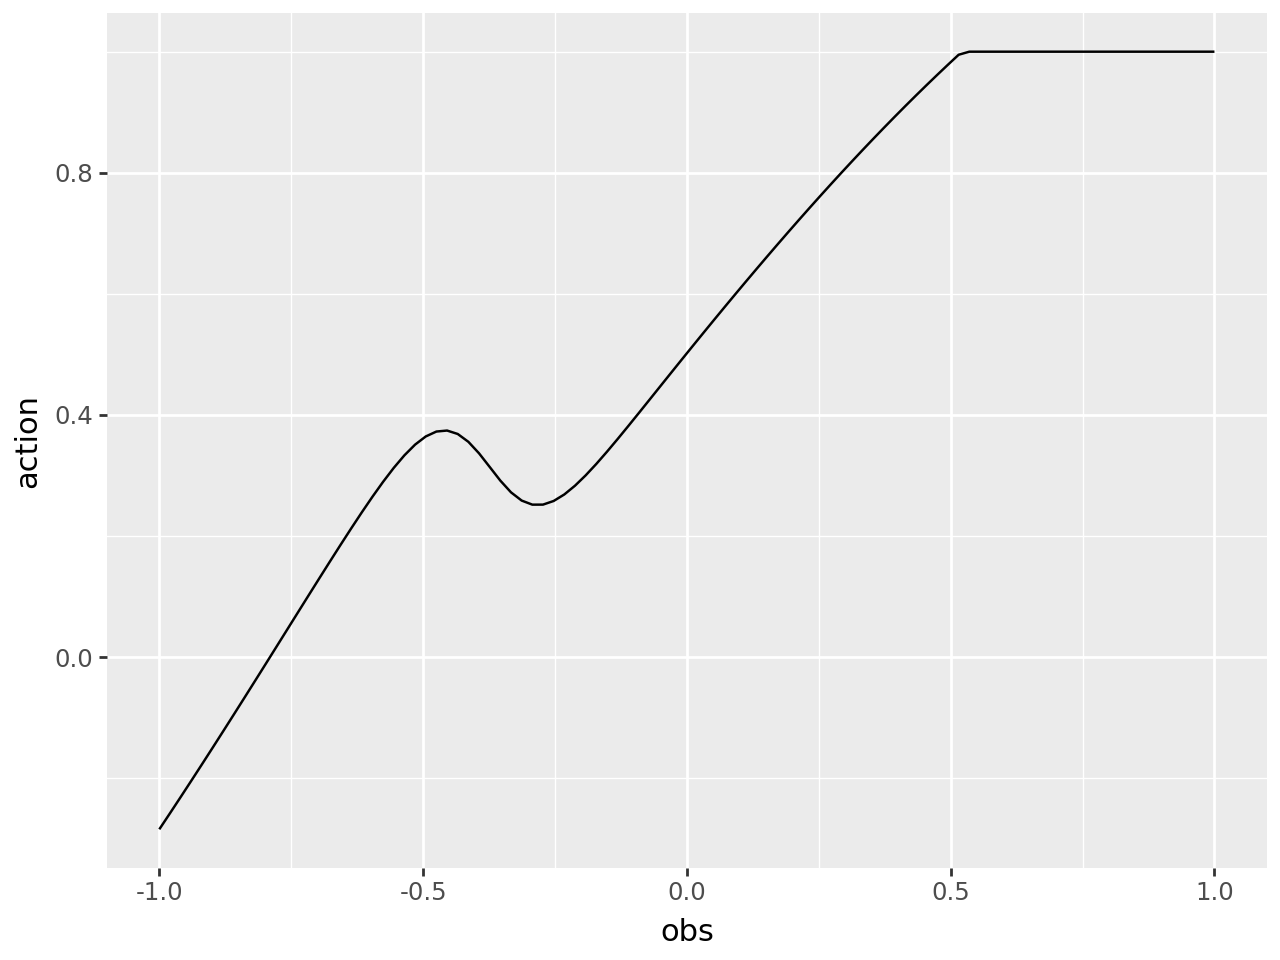

In [8]:
model = PPO("MlpPolicy", env, device="cpu")
agent = model.load("ppo_fish")
policy_fn(agent, env, N = 100)